In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris1 = pd.DataFrame(iris.data,columns=iris.feature_names)
iris1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>

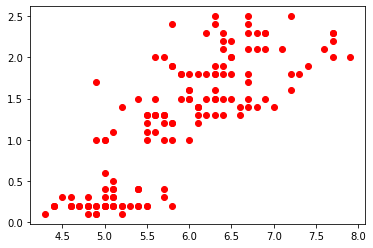

In [3]:
plt.scatter(iris1['sepal length (cm)'],iris1['petal width (cm)'],color=('red'))

In [4]:
iris1.drop(['sepal width (cm)','petal length (cm)'],axis=1,inplace=True)

In [5]:
iris1

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [6]:
from sklearn.cluster import KMeans
for k in range(1,4):
    km = KMeans(k)
    prediction = km.fit_predict(iris1[['sepal length (cm)','petal width (cm)']])
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [7]:
iris1['prediction']=prediction

In [8]:
iris1['prediction'].values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [9]:
km.cluster_centers_

array([[6.85714286, 2.01190476],
       [5.89259259, 1.46296296],
       [5.00555556, 0.3037037 ]])

In [10]:
df = iris1

In [11]:
df

,sepal length (cm),petal width (cm),prediction
0,5.1,0.2,2
1,4.9,0.2,2
2,4.7,0.2,2
3,4.6,0.2,2
4,5.0,0.2,2
...,...,...,...
145,6.7,2.3,0
146,6.3,1.9,0
147,6.5,2.0,0
148,6.2,2.3,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

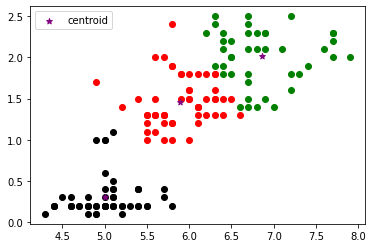

In [12]:
df1 = df[df.prediction==0]
df2 = df[df.prediction==1]
df3 = df[df.prediction==2]
df4 = df[df.prediction==3]
df5 = df[df.prediction==4]
df6 = df[df.prediction==5]
df7 = df[df.prediction==6]
df8 = df[df.prediction==7]
df9 = df[df.prediction==8]
plt.scatter(df1['sepal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

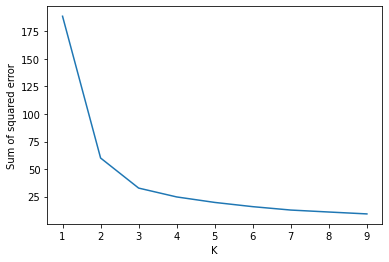

In [13]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)